In [2]:
# from pde import PDE,DiffusionPDE, ScalarField, SphericalGrid, PolarGrid
import pde
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]

In [6]:
from pde import FieldCollection, PDEBase, UnitGrid


class FitzhughNagumoPDE(PDEBase):
    """ FitzHugh–Nagumo model with diffusive coupling """

    def __init__(self, stimulus=0.5, τ=10, a=0, b=0, bc="natural"):
        self.bc = bc
        self.stimulus = stimulus
        self.τ = τ
        self.a = a
        self.b = b

    def evolution_rate(self, state, t=0):
        v, w = state  # membrane potential and recovery variable

        v_t = v.laplace(bc=self.bc) + v - v ** 3 / 3 - w + self.stimulus
        w_t = (v + self.a - self.b * w) / self.τ

        return FieldCollection([v_t, w_t])


grid = UnitGrid([32, 32])
state = FieldCollection.from_scalar_expressions(grid, '2')

eq = FitzhughNagumoPDE()
result = eq.solve(state, t_range=100, dt=0.01)
result.plot(action='show')

TypeError: from_scalar_expressions() takes 3 positional arguments but 4 were given

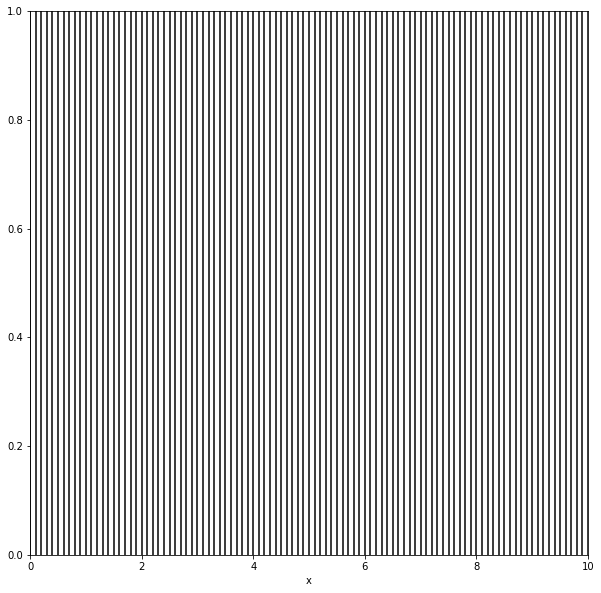

In [16]:
#kartézskej grid

domain_size = 10.
grid_size = 100
dx = domain_size/(grid_size+1)

grid = pde.CartesianGrid([[0, domain_size]], [grid_size], periodic=True)
grid.plot(action='show')

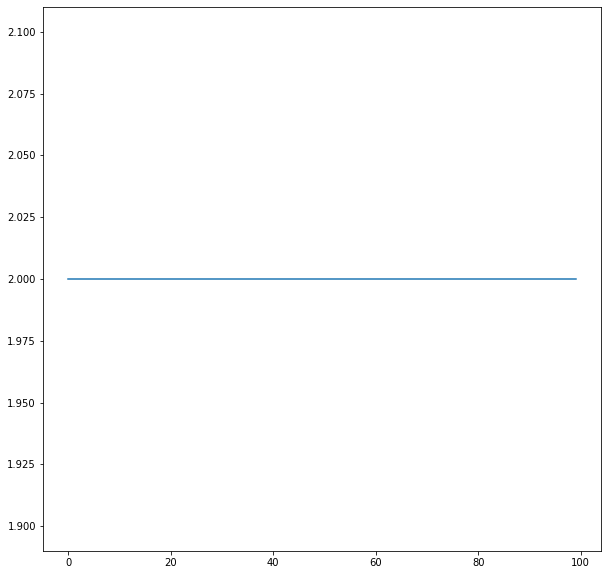

In [20]:
# počáteční podmínka na CartesianGrid

x0 = np.zeros(grid.shape)
x0[grid_size//2 - 2:grid_size//2 + 2] = 0.7
#state = pde.ScalarField(grid,x0)
state = pde.ScalarField.from_expression(grid,'2')
plt.plot(state.data)


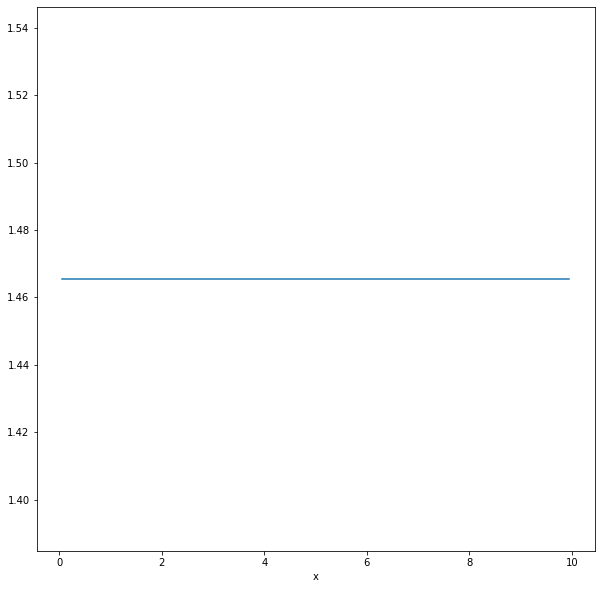

In [22]:
#řešení rovnice - zatím v 1d
eq = pde.PDE(
    {"u": "laplace(u) + u*(1-u)*(u-.5)"},
)
result = eq.solve(state, t_range=.3, dt=0.1)
result.plot(action='show')

# ve 2D

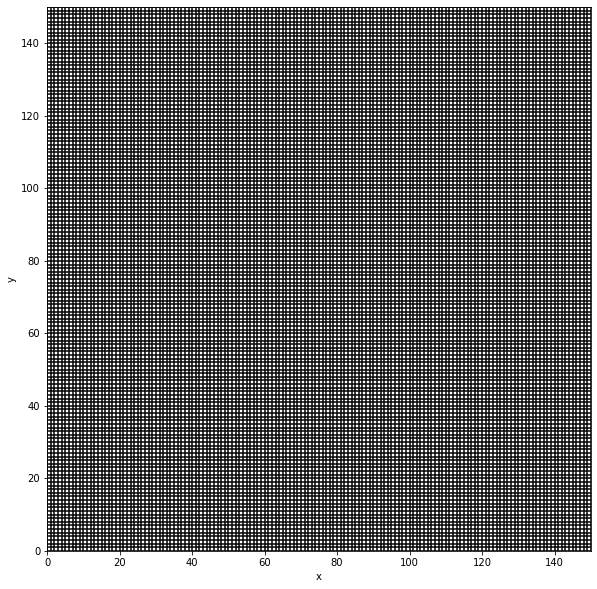

In [3]:
domain_size = 150.
grid_size = 150
dx = domain_size/(grid_size+1)

grid = pde.CartesianGrid([[0, domain_size]]*2, grid_size)
grid.plot(action='show')

CartesianGrid(bounds=((0.0, 150.0), (0.0, 150.0)), shape=(150, 150), periodic=[False, False])

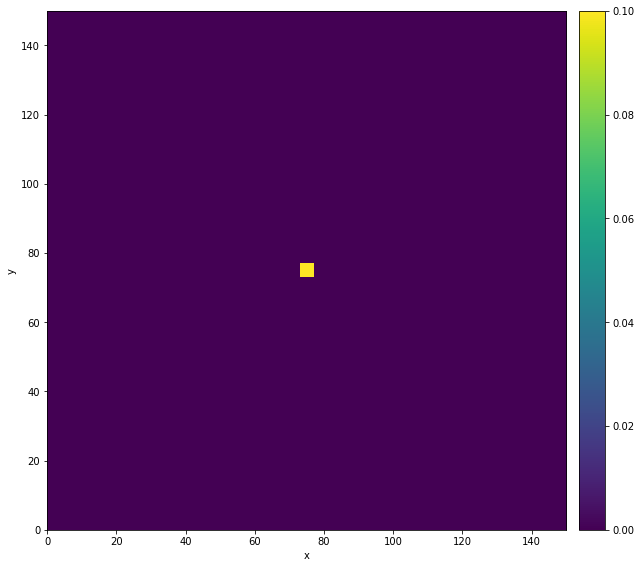

In [4]:
# počáteční podmínka na 2d CartesianGrid

x0 = np.zeros(grid.shape)
#print(x0)
x0[grid_size//2 - 2:grid_size//2 + 2, grid_size//2 - 2:grid_size//2 + 2] = 0.1
#print(x0)
state = pde.ScalarField(grid,x0)
state.plot(action='show')

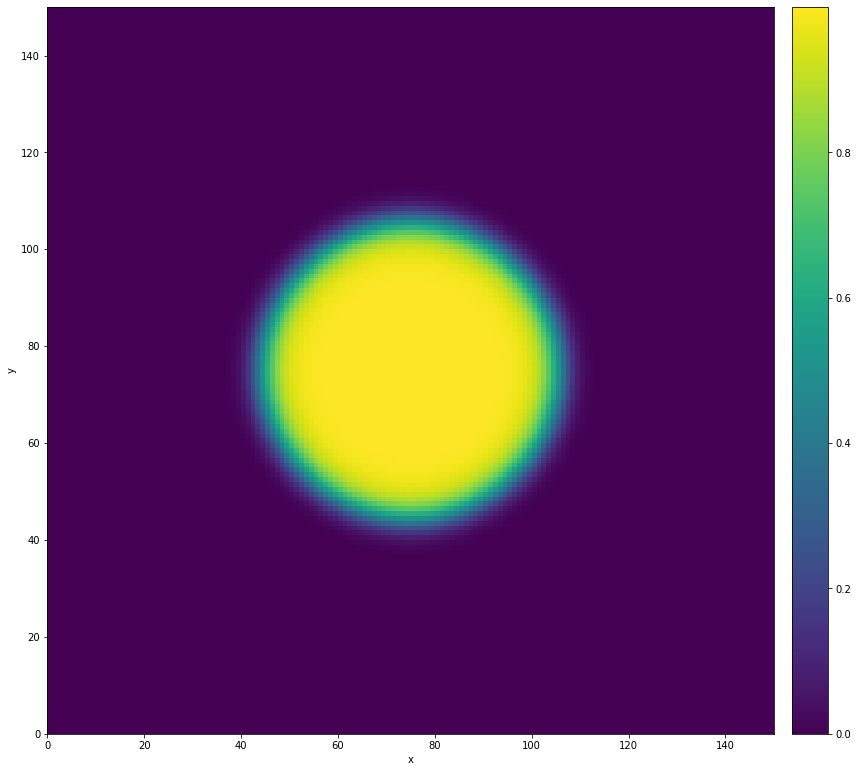

In [22]:
#řešení rovnice - zatím ve 2d
eq = pde.PDE(
    {"u": "laplace(u) + u*(1-u)"},
)
result = eq.solve(state, t_range=20, dt=0.1)
result.plot(action='show')

0.9999963504318944


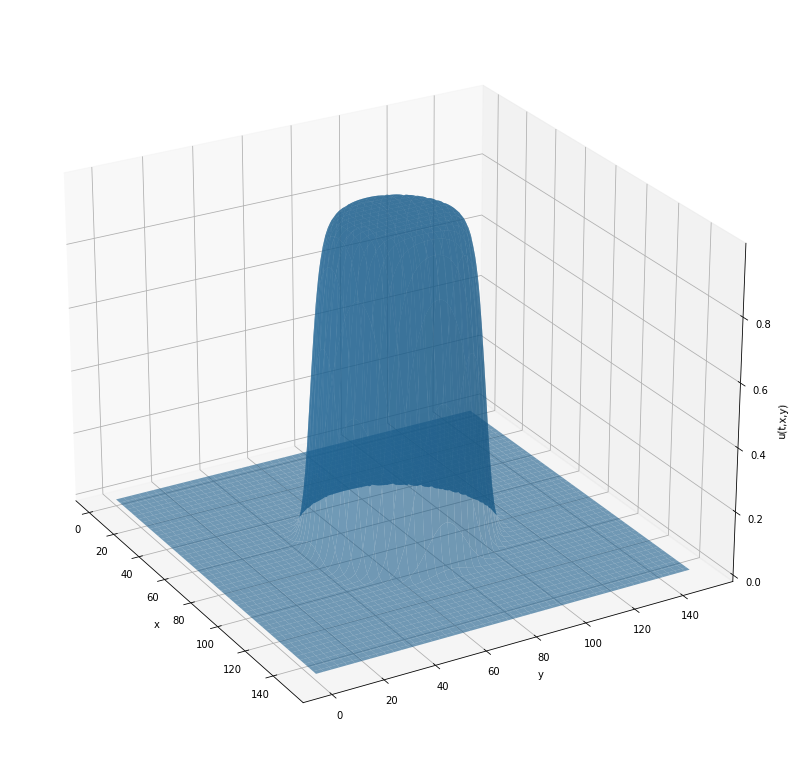

In [25]:
plt.rcParams['figure.figsize'] = [14, 14]
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(0,domain_size, result.data.shape[0])
#print(X)
Y = np.linspace(0,domain_size, result.data.shape[1])
#print(Y.shape)
X, Y = np.meshgrid(X, Y)
#print(Y.shape)
Z = result.data
print(Z[75,75])
surf = ax.plot_surface(X, Y, Z, alpha=0.6)

ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('u(t,x,y)')
ax.view_init(25,-30)

plt.show()

$\lfloor x \rfloor$